In [1]:
import time
import warnings
from typing import Tuple, List, Dict, Union
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

pd.set_option('display.max_rows', 100)

In [2]:
df = pd.read_csv('../complete_data.csv')
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,followers,genre_artist,name_artist,popularity_artist,duration_mins
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,...,0.744000,0.1510,0.1270,104.851,3,91.0,[''],Uli,4.0,2.115050
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,...,0.000000,0.1480,0.6550,102.009,1,3.0,[''],Fernando Pessoa,0.0,1.636667
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,...,0.021800,0.2120,0.4570,130.418,5,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0,3.027333
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,...,0.918000,0.1040,0.3970,169.980,3,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0,2.948450
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922-01-01,0.402,0.1580,...,0.130000,0.3110,0.1960,103.220,4,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35.0,2.718000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],1QLBXKM5GCpyQQSVMNZqrZ,2020-09-26,0.560,0.5180,...,0.000000,0.0648,0.2110,131.896,4,896.0,['chinese viral pop'],阿YueYue,38.0,4.304450
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],1dy5WNgIKQU6ezkpZs4y8z,2020-10-21,0.765,0.6630,...,0.000297,0.0924,0.6860,150.091,4,245944.0,"['alt z', 'alternative r&b', 'bedroom pop', 'i...",ROLE MODEL,67.0,2.554883
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],37M5pPGs6V1fchFJSgCguX,2020-09-02,0.535,0.3140,...,0.000150,0.0874,0.0663,145.095,4,1168213.0,"['alt z', 'electropop', 'indie pop', 'la indie...",FINNEAS,77.0,3.126683
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",4jGPdu95icCKVF31CcFKbS,2021-03-05,0.696,0.6150,...,0.000003,0.3050,0.4380,90.029,4,45309.0,"['chill r&b', 'indie cafe pop', 'singaporean p...",Gentle Bones,58.0,2.366717


In [3]:
cleaned_df = df[ ~(df['genre_artist'] == "['']") ].dropna()
cleaned_df.reset_index(inplace=True, drop=True)
cleaned_df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,followers,genre_artist,name_artist,popularity_artist,duration_mins
0,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,...,0.021800,0.2120,0.4570,130.418,5,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0,3.027333
1,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,...,0.918000,0.1040,0.3970,169.980,3,3528.0,"['tango', 'vintage tango']",Ignacio Corsini,23.0,2.948450
2,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922-01-01,0.402,0.1580,...,0.130000,0.3110,0.1960,103.220,4,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35.0,2.718000
3,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0,178933,0,['Dick Haymes'],3BiJGZsyX9sJchTqcSA7Su,1922-01-01,0.227,0.2610,...,0.247000,0.0977,0.0539,118.891,4,11327.0,"['adult standards', 'big band', 'easy listenin...",Dick Haymes,35.0,2.982217
4,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,['Mistinguett'],4AxgXfD7ISvJSTObqm4aIE,1922-01-01,0.563,0.1840,...,0.000016,0.3250,0.6540,133.088,3,5078.0,['vintage chanson'],Mistinguett,22.0,2.690450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525638,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],1QLBXKM5GCpyQQSVMNZqrZ,2020-09-26,0.560,0.5180,...,0.000000,0.0648,0.2110,131.896,4,896.0,['chinese viral pop'],阿YueYue,38.0,4.304450
525639,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],1dy5WNgIKQU6ezkpZs4y8z,2020-10-21,0.765,0.6630,...,0.000297,0.0924,0.6860,150.091,4,245944.0,"['alt z', 'alternative r&b', 'bedroom pop', 'i...",ROLE MODEL,67.0,2.554883
525640,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],37M5pPGs6V1fchFJSgCguX,2020-09-02,0.535,0.3140,...,0.000150,0.0874,0.0663,145.095,4,1168213.0,"['alt z', 'electropop', 'indie pop', 'la indie...",FINNEAS,77.0,3.126683
525641,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']",4jGPdu95icCKVF31CcFKbS,2021-03-05,0.696,0.6150,...,0.000003,0.3050,0.4380,90.029,4,45309.0,"['chill r&b', 'indie cafe pop', 'singaporean p...",Gentle Bones,58.0,2.366717


In [4]:
genre_df = cleaned_df[['id','genre_artist']]
genre_df.head()


,id,genre_artist
0,07A5yehtSnoedViJAZkNnc,"['tango', 'vintage tango']"
1,08FmqUhxtyLTn6pAh6bk45,"['tango', 'vintage tango']"
2,08y9GfoqCWfOGsKdwojr5e,"['adult standards', 'big band', 'easy listenin..."
3,0BRXJHRNGQ3W4v9frnSfhu,"['adult standards', 'big band', 'easy listenin..."
4,0IA0Hju8CAgYfV1hwhidBH,['vintage chanson']


In [5]:
def str_to_list(row):
    """convert a string List into a List"""
    row = str(row).strip("[]").replace("'","") #.split(", ")
    return row

In [6]:
genre_df['cleaned_genre'] = genre_df['genre_artist'].apply(str_to_list)


In [7]:
genre_df['cleaned_genre']

0                                      tango, vintage tango
1                                      tango, vintage tango
2         adult standards, big band, easy listening, lou...
3         adult standards, big band, easy listening, lou...
4                                           vintage chanson
                                ...                        
525638                                    chinese viral pop
525639    alt z, alternative r&b, bedroom pop, indie caf...
525640    alt z, electropop, indie pop, la indie, pop, p...
525641           chill r&b, indie cafe pop, singaporean pop
525642                            chicha, cumbia, nu-cumbia
Name: cleaned_genre, Length: 525643, dtype: object

In [8]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre_df['cleaned_genre'])

In [9]:
weighted_df = pd.DataFrame(X.toarray(), columns = ['genre' + "-" + i for i in vectorizer.get_feature_names_out()])
weighted_df.head()

,genre-150,genre-21st,genre-432hz,genre-48g,genre-abc,genre-abstract,genre-acadienne,genre-accordeon,genre-accordion,genre-aceh,...,genre-zikir,genre-zillertal,genre-zim,genre-zither,genre-zolo,genre-zouglou,genre-zouk,genre-zuliana,genre-zurich,genre-zydeco
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
cleaned_features_df= cleaned_df[['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'popularity_artist']]

In [11]:
complete_features_df = pd.concat([weighted_df, cleaned_features_df], axis=1)


In [12]:
complete_features_df

,genre-150,genre-21st,genre-432hz,genre-48g,genre-abc,genre-abstract,genre-acadienne,genre-accordeon,genre-accordion,genre-aceh,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_artist
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5,23.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3,23.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4,35.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.343,1,0.0382,0.994,0.247000,0.0977,0.0539,118.891,4,35.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-13.757,1,0.0512,0.993,0.000016,0.3250,0.6540,133.088,3,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4,38.0
525639,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4,67.0
525640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4,77.0
525641,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4,58.0


In [14]:
complete_features_X = complete_features_df.to_numpy()

### k Means model (150 clusters)

In [ ]:
# %%time
# sns.set_style("darkgrid")

# Sum_of_squared_distances = []
# K = range(100,450, 50)
# for k in K:
#     km = KMeans(n_clusters=k, max_iter=200, n_init=10)
#     km = km.fit(complete_features_X)
#     Sum_of_squared_distances.append(km.inertia_)
# sns.lineplot(x = K, y=Sum_of_squared_distances, marker="o")
# plt.xlabel('k')
# plt.ylabel('Sum of squared distances')
# plt.title('Elbow Method For Optimal k')
# plt.show()

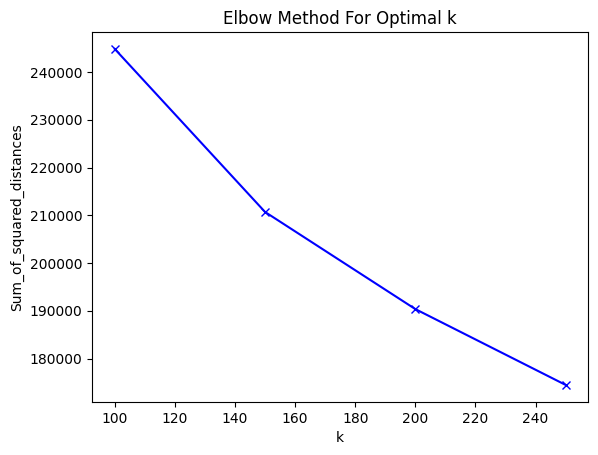

In [18]:
from IPython import display
display.Image("../elbowmethod_kmeans_tdidf.png")

In [ ]:

kmeans = KMeans(n_clusters=150)
kmeans.fit(complete_features_X)
# result = pd.concat([text1, pd.DataFrame(complete_features_X.toarray(), columns=vectorizer.get_feature_names())],axis=1)

# weighted_df['cluster'] = kmeans.predict(X)

In [16]:
weighted_df.head()

,genre-150,genre-21st,genre-432hz,genre-48g,genre-abc,genre-abstract,genre-acadienne,genre-accordeon,genre-accordion,genre-aceh,...,genre-zillertal,genre-zim,genre-zither,genre-zolo,genre-zouglou,genre-zouk,genre-zuliana,genre-zurich,genre-zydeco,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128


In [23]:
features_df = pd.concat([cleaned_df[['id', 'name', 'artists']], weighted_df], axis=1)

In [35]:
features_df.head()

,id,name,artists,genre-150,genre-21st,genre-432hz,genre-48g,genre-abc,genre-abstract,genre-acadienne,...,genre-zillertal,genre-zim,genre-zither,genre-zolo,genre-zouglou,genre-zouk,genre-zuliana,genre-zurich,genre-zydeco,cluster
0,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,['Ignacio Corsini'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
1,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,['Ignacio Corsini'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48
2,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,['Dick Haymes'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
3,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,['Dick Haymes'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16
4,0IA0Hju8CAgYfV1hwhidBH,La Java,['Mistinguett'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128


In [54]:
test = features_df[features_df['id'] == '68UIOPderAlQy5eb7K4iUO']
model_test = test.select_dtypes(include=np.number).drop(['cluster'], axis=1)
model_test

,genre-150,genre-21st,genre-432hz,genre-48g,genre-abc,genre-abstract,genre-acadienne,genre-accordeon,genre-accordion,genre-aceh,...,genre-zikir,genre-zillertal,genre-zim,genre-zither,genre-zolo,genre-zouglou,genre-zouk,genre-zuliana,genre-zurich,genre-zydeco
74735,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def cosine_similarity_into_same_cluster(features_df: pd.DataFrame, tesy_df: pd.DataFrame) -> pd.DataFrame:
    return ''
    

In [51]:
similarity_test_df = features_df[features_df['cluster'] == 81].select_dtypes(include=np.number).drop(['cluster'], axis=1)

In [55]:
similarity = cosine_similarity(similarity_test_df, model_test )
similarity

array([[0.5331146 ],
       [0.5331146 ],
       [0.5331146 ],
       ...,
       [0.45912968],
       [0.6699241 ],
       [0.45912968]])

In [59]:
similarity_df = pd.DataFrame(similarity, columns=['cosine_similarity'])
len(similarity)

6401

In [65]:
cluster_81_features = features_df[features_df['cluster'] == 81].reset_index(drop=True)
cluster_81_features

,id,name,artists,genre-150,genre-21st,genre-432hz,genre-48g,genre-abc,genre-abstract,genre-acadienne,...,genre-zillertal,genre-zim,genre-zither,genre-zolo,genre-zouglou,genre-zouk,genre-zuliana,genre-zurich,genre-zydeco,cluster
0,4J2xMy0kakU9sAin1uppxb,La Balsa,['Los Gatos'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81
1,20ILhYY5QbmsNc8KKBf8w5,Ayer Nomás,['Los Gatos'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81
2,5Qz4D3NixycveVWlTgksDn,"Viento, Dile a la Lluvia",['Los Gatos'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81
3,6GPkBUXMrGSkwK3TrrHHXN,Muchacha (Ojos de Papel),['Almendra'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81
4,2P2tl8JT698TJJ55ScKyku,Ana No Duerme,['Almendra'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6396,72AeQrGL5d5dEjH5HSJdrC,A Esa Gran Velocidad,['El Haragán y Compañía'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81
6397,0OA7GVjGeOi2XYBZbrb36B,No Estoy Muerto,['El Haragán y Compañía'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81
6398,0j59k2JS2uRvynyFKLPxdo,En el Corazon No Hay Nada,['El Haragán y Compañía'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81
6399,2D39aF4l73A2VNdLJfnSB2,Bellos Recuerdos,['El Haragán y Compañía'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81


In [68]:
results = pd.concat([cluster_81_features, similarity_df], axis=1)
results.sort_values('cosine_similarity', ascending=False).head(20)

,id,name,artists,genre-150,genre-21st,genre-432hz,genre-48g,genre-abc,genre-abstract,genre-acadienne,...,genre-zim,genre-zither,genre-zolo,genre-zouglou,genre-zouk,genre-zuliana,genre-zurich,genre-zydeco,cluster,cosine_similarity
2287,4Gs27M8i56reD8sxZ2Oo1h,El solitario (feat. David Hidalgo) (Diario de ...,"['Bunbury', 'David Hidalgo']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81,1.0
737,68UIOPderAlQy5eb7K4iUO,Souvenir,['León Larregui'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81,1.0
743,0dRY4OrSY53yUjVgfgne1W,Aunque no sea conmigo,"['Bunbury', 'Andrés Calamaro']",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81,1.0
2283,7hVhusrpf5kB6K3nk06YBx,Lo que más te gustó de mí,['Bunbury'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81,1.0
923,2B62QB3qfZmsrFuaIJFOkX,Alicia - Expulsada al País de las Maravillas,['Bunbury'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81,1.0
2288,0QC4Znh90uZfv90lnhKMlx,Ódiame,['Bunbury'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81,1.0
4601,4UKPN3a2DsNomDTEQBuHOE,Tiraste A Matar,['León Larregui'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81,1.0
2291,1FdU4MHZvtVraJgnccMd16,Más alto que nosotros sólo el cielo,['Bunbury'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81,1.0
4597,1BokDaNfW9LVbEHBABNIUv,Birdie,['León Larregui'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81,1.0
2295,5okqhr7805Y9x51CaR2U9U,La constante,['Bunbury'],0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,81,1.0
